In [60]:
# Imports
import numpy as np
import matplotlib.pyplot  as plt
import random


In [61]:
# Declaring constants
n = 3
a0 = 0
a1 = 1
a2 = 0.5
a3 = -2
a = np.array([a0,a1,a2,a3]).T
sigma = 0.5
mu = 0
m = 10000
w = np.random.normal(mu,sigma,(1,m))
x = np.random.uniform(-1,1,(1,m))
f = a0 + a1*x + a2*x**2 + a3*x**3
y = f + w
print(a.shape)


(4,)


In [62]:
# Question 3
# Create the matrix X as defined in section 2
def create_X(x):
    X = np.zeros((m,n+1))
    powers = np.arange(n+1)
    for i in powers:
        X[:,i] = np.power(x.T,i).flatten()
    return X


In [63]:
def estimation_func(x,y):
    X = create_X(x)
    a_hat = np.linalg.inv(X.T@X)@X.T@y.T
    return a_hat

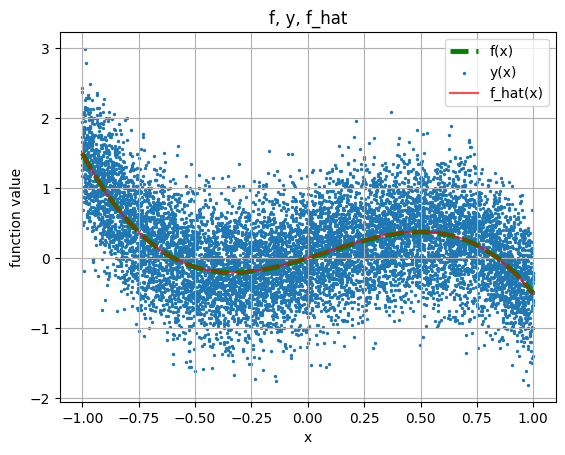

In [64]:
# Question 4
a_hat = estimation_func(x, y)
f = a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3
f_hat = a_hat[0] + a_hat[1]*x + a_hat[2]*x**2 + a_hat[3]*x**3
# Sort x and corresponding values for clean line plots
sort_idx = np.argsort(x.flatten())
x_sorted = x.flatten()[sort_idx]
f_sorted = f.flatten()[sort_idx]
f_hat_sorted = f_hat.flatten()[sort_idx]

plt.plot(x_sorted, f_sorted, 'g--', linewidth=3.5, label='f(x)')     # make f(x) thicker
plt.scatter(x.flatten(), y.flatten(), s=2, label='y(x)')            # noisy samples
plt.plot(x_sorted, f_hat_sorted, 'r', alpha=0.7, label='f_hat(x)')  # slightly transparent
plt.xlabel('x')
plt.ylabel('function value')
plt.legend()
plt.title('f, y, f_hat')
plt.grid(True)
plt.show()


In [65]:
r = 4

In [66]:
# Question 5
D = 2*r
X_1 = create_X(x)
eigenvalues = np.linalg.eigvals((X_1.T@X_1)/m)
lambda_max = np.max(eigenvalues)
G = 2*r*lambda_max + np.linalg.norm((X_1.T@y.T)/m,2)

In [67]:
def decaying_eta(t,gradien_norm_array):
    return D/(G*np.sqrt(t))

def ada_grad_eta(t,gradient_norm_array):
    return D/(2*np.sum(gradient_norm_array))

In [68]:
def projected_GD(x,y,eta_func=None,eta_const=0):
    X = create_X(x)
    epsilon = 0.01
    max_it = 1000
    at = np.random.normal(0,1,(n+1,1))
    if np.linalg.norm(at,2) > r:
        at = r*(at/np.linalg.norm(at,2))

    gradient_norm_array = []
    all_at = at
    for i in range(max_it):
        grad = (1/m)*(X.T @ ( X @ at - y.T))
        grad_norm = np.linalg.norm(grad,2)
        gradient_norm_array.append(grad_norm)
        if eta_const == 0:
            eta = eta_func(i+1,np.array(gradient_norm_array))
        else:
            eta = eta_const
        at_1 = at - eta*grad
        if np.linalg.norm(at_1,2) > r:
            at_1 = r*(at_1/np.linalg.norm(at_1,2))
        at = at_1
        # print(at)
        all_at = np.concatenate((all_at,at),axis=1)
        if grad_norm < epsilon:
            print(f'grad < epsilon terminating at iteration {i}')
            break

    return all_at

In [69]:
# Question 6o
def compute_errors(a_hat, X, y, h_a):
    errors = np.zeros(a_hat.shape[1])
    for i in range(a_hat.shape[1] ):
        h = (1 / (2 * m)) * np.sum((y.T - X @ a_hat[:, i])**2)
        errors[i] = np.abs(h_a - h)
    return errors[:-1]

In [70]:
a_hat_decay = projected_GD(x,y,eta_func=decaying_eta)

X_2 = create_X(x)

h_a_1 = (1/(2*m))*np.sum((y.T-X_2@a)**2)

errors = compute_errors(a_hat_decay, X_2, y, h_a_1)


it = np.linspace(1,errors.shape[0],errors.shape[0])




In [71]:

a_hat_ada = projected_GD(x,y,eta_func=ada_grad_eta)


errors1 =  compute_errors(a_hat_ada, X_2, y, h_a_1)


it2 = np.linspace(1,errors1.shape[0],errors1.shape[0])

grad < epsilon terminating at iteration 83


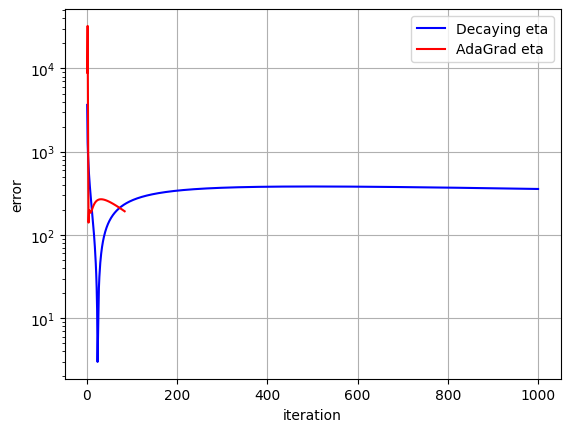

In [72]:
plt.plot(it,errors,'b',label='Decaying eta')
plt.plot(it2,errors1,'r',label='AdaGrad eta')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid(True)
plt.yscale('log')
plt.legend()


In [73]:
L = lambda_max
a_hat_step1 = projected_GD(x,y,eta_const=1/(10*L))
errors_step1 =  compute_errors(a_hat_step1, X_2, y, h_a_1)
it_step1 = np.linspace(1,errors_step1.shape[0],errors_step1.shape[0])

grad < epsilon terminating at iteration 842


In [74]:
a_hat_step2 = projected_GD(x,y,eta_const=1/L)
errors_step2 =  compute_errors(a_hat_step2, X_2, y, h_a_1)
it_step2 = np.linspace(1,errors_step2.shape[0],errors_step2.shape[0])

grad < epsilon terminating at iteration 110


In [76]:
a_hat_step3= projected_GD(x,y,eta_const=10/L)
errors_step3 =  compute_errors(a_hat_step3, X_2, y, h_a_1)
it_step3 = np.linspace(1,errors_step3.shape[0],errors_step3.shape[0])

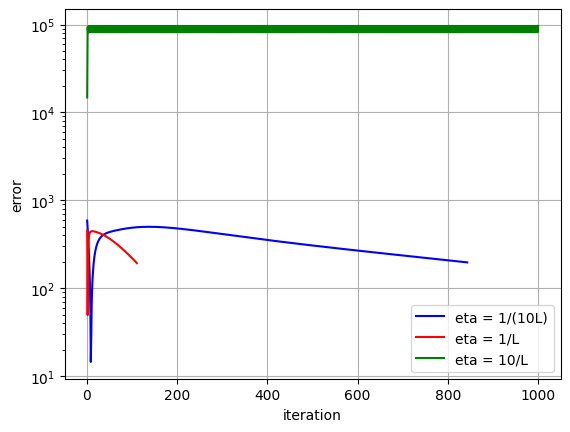

In [77]:
plt.plot(it_step1,errors_step1,'b',label='eta = 1/(10L)')
plt.plot(it_step2,errors_step2,'r',label='eta = 1/L')
plt.plot(it_step3,errors_step3,'g',label='eta = 10/L')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid(True)
plt.yscale('log')
plt.legend()

In [78]:
import time
def stochastic_gd(x,y,b):
    X = create_X(x)
    epsilon = 0.01
    max_it = 1000
    at = np.random.normal(0,1,(n+1,1))
    all_at = at.copy()
    timestamps = []
    if np.linalg.norm(at,2) > r:
        at = r*(at/np.linalg.norm(at,2))

    y = y.reshape(-1, 1)
    start_time = time.time()
    for i in range(max_it):
        samples = np.random.randint(0, m, size=b)
        X_batch = X[samples,:]
        y_batch = y[samples]
        grad = (1/b)*(X_batch.T @ ( X_batch @ at - y_batch))
        grad_norm = np.linalg.norm(grad,2)
        eta = decaying_eta(i+1,None)
        at_1 = at - eta*grad
        if np.linalg.norm(at_1,2) > r:
            at_1 = r*(at_1/np.linalg.norm(at_1,2))
        at = at_1
        all_at = np.concatenate((all_at,at),axis=1)
        timestamps.append(time.time() - start_time)
        if grad_norm < epsilon:
            print(f'grad < epsilon terminating at iteration {i}')
            break

    return all_at, timestamps


In [79]:
a_hat_1, a_hat_1_t = stochastic_gd(x,y,1)
X_3 = create_X(x)
h_a_1 = (1/(2*m))*np.sum((y.T-X_3@a)**2)
errors_b1 = compute_errors(a_hat_1, X_3, y, h_a_1)

grad < epsilon terminating at iteration 129


In [80]:
a_hat_10, a_hat_10_t = stochastic_gd(x,y,10)

errors_b10 = compute_errors(a_hat_10, X_3, y, h_a_1)

In [81]:
a_hat_100, a_hat_100_t = stochastic_gd(x,y,100)

errors_b100 = compute_errors(a_hat_100, X_3, y, h_a_1)

In [82]:
a_hat_10000, a_hat_10000_t = stochastic_gd(x,y,10000)

errors_b10000 = compute_errors(a_hat_10000, X_3, y, h_a_1)

grad < epsilon terminating at iteration 775


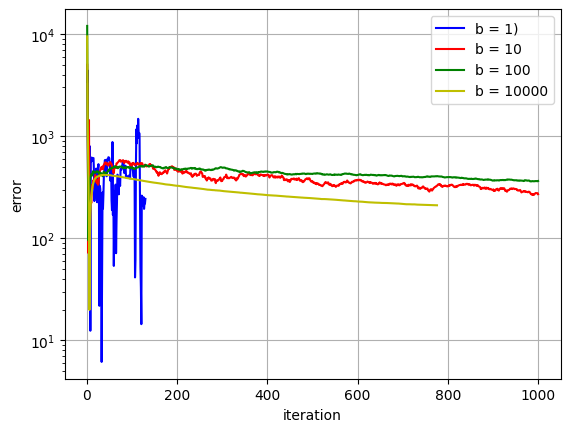

In [83]:
it_step1 = np.linspace(1,errors_b1.shape[0],errors_b1.shape[0])
it_step10 = np.linspace(1,errors_b10.shape[0],errors_b10.shape[0])
it_step100 = np.linspace(1,errors_b100.shape[0],errors_b100.shape[0])
it_step10000 = np.linspace(1,errors_b10000.shape[0],errors_b10000.shape[0])
plt.plot(it_step1,errors_b1,'b',label='b = 1)')
plt.plot(it_step10,errors_b10,'r',label='b = 10')
plt.plot(it_step100,errors_b100,'g',label='b = 100')
plt.plot(it_step10000,errors_b10000,'y',label='b = 10000')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid(True)
plt.yscale('log')
plt.legend()

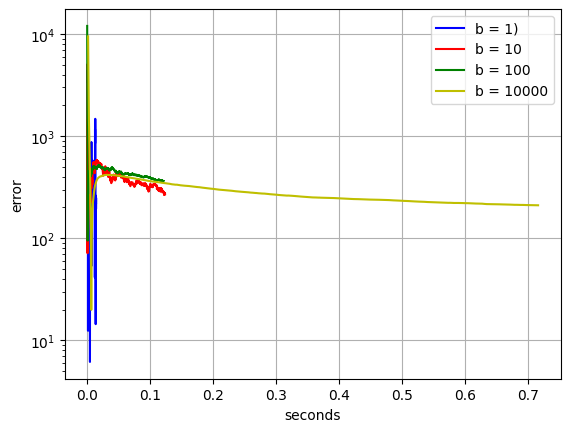

In [84]:
plt.plot(a_hat_1_t,errors_b1,'b',label='b = 1)')
plt.plot(a_hat_10_t,errors_b10,'r',label='b = 10')
plt.plot(a_hat_100_t,errors_b100,'g',label='b = 100')
plt.plot(a_hat_10000_t,errors_b10000,'y',label='b = 10000')
plt.xlabel('seconds')
plt.ylabel('error')
plt.grid(True)
plt.yscale('log')
plt.legend()